In [1]:
from timagetk import LabelledImage
from timagetk.io import imread
from ctrl.tracking import CellTracking

2021-09-24 12:49:26,150 - ctrl.matching_flow_graph - 37 - WARNING - Could not find gurobipy, PuLP will be used by default!
2021-09-24 12:49:26,151 - ctrl.matching_flow_graph - 38 - INFO - Use `python -m pip install gurobipy` to install it!


## Load the intensity and segmented images

In [2]:
mother_img = imread("/data/FPS_paper/Old_Data/p194/fusion/p194-t5-v2.inr.gz")
daughter_img = imread("/data/FPS_paper/Old_Data/p194/fusion/p194-t6_mean_it1.inr.gz")
mother_seg_img = imread("/data/FPS_paper/Old_Data/p194/watershed_segmentation/p194-t5-v2_SegXP.inr.gz", LabelledImage, not_a_label=0)
daughter_seg_img = imread("/data/FPS_paper/Old_Data/p194/watershed_segmentation/p194-t6-v2_SegXP.inr.gz", LabelledImage, not_a_label=0)

## Creates an object dedicated to cell tracking

In [3]:
tracker = CellTracking(mother_img, daughter_img, mother_seg_img, daughter_seg_img, trsf_direction="backward")
tracker._auto_register()

2021-09-24 11:52:42,453 - ctrl.tracking - 777 - INFO - # Automatic estimation of non-linear transformation in 'backward' direction...
2021-09-24 11:52:42,454 - ctrl.tracking - 802 - INFO - Fully automatic linear registration...
2021-09-24 11:52:42,456 - timagetk.algorithms.blockmatching - 277 - INFO - RIGID registration
2021-09-24 11:53:24,232 - timagetk.algorithms.blockmatching - 277 - INFO - AFFINE registration with a 'left' initialisation matrix
2021-09-24 11:54:03,839 - ctrl.tracking - 864 - INFO - Estimate non-linear transformation using linear transformation
2021-09-24 11:54:03,839 - timagetk.algorithms.blockmatching - 277 - INFO - VECTORFIELD registration with a 'left' initialisation matrix


## Show the resulting registration

### Retreive the predicted transformation & apply it to the registered intensity image

In [4]:
from timagetk.algorithms.trsf import apply_trsf

In [5]:
daughter_reg = apply_trsf(daughter_img, tracker.trsf, interpolation="linear")

2021-09-24 12:01:07,913 - timagetk.algorithms.trsf - 266 - CRITICAL - Can not apply vectorfield transformation with template image!
2021-09-24 12:01:07,914 - timagetk.algorithms.trsf - 267 - INFO - Applying vectorfield transformation WITHOUT template image!


In [6]:
from timagetk.visu.stack import orthogonal_view
from timagetk.components.multi_channel import combine_channels

### Display the blending

In [7]:
int_reg = combine_channels([mother_img, daughter_reg], colors=['green', 'red'])

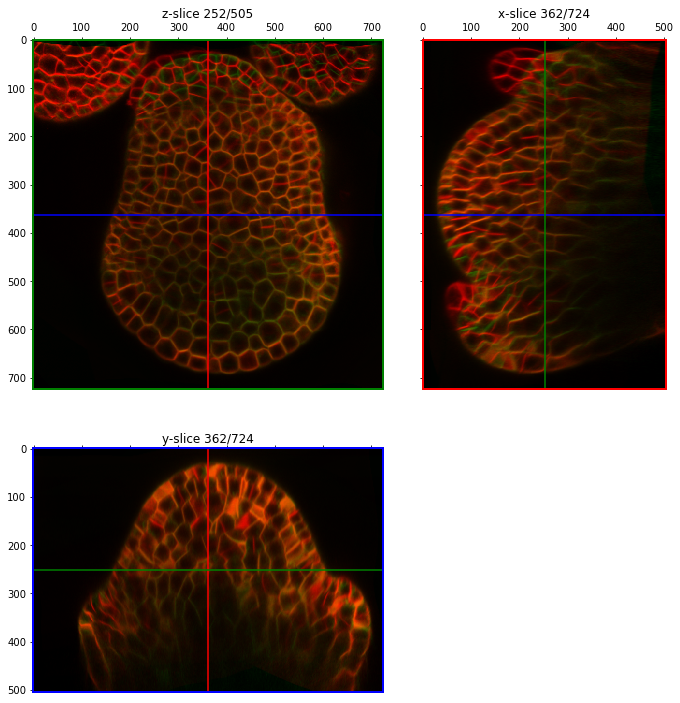

In [8]:
orthogonal_view(int_reg, figsize=(12., 12.))

## Initialize with a rigid transformation

This rigid transformation has been obtained using a manual lineage.

In [9]:
from timagetk.io.trsf import read_trsf
init_trsf = read_trsf('/data/FPS_paper/Old_Data/p194/trsf/p194-t4_t5-rigid.trsf')

In [10]:
tracker = CellTracking(mother_img, daughter_img, mother_seg_img, daughter_seg_img, trsf_direction="backward",
                       init_trsf=init_trsf)
tracker._auto_register()

2021-09-24 12:01:29,775 - ctrl.tracking - 777 - INFO - # Automatic estimation of non-linear transformation in 'backward' direction...
2021-09-24 12:01:29,775 - ctrl.tracking - 796 - INFO - Automatic linear registration with initialisation...
2021-09-24 12:01:29,776 - timagetk.algorithms.blockmatching - 277 - INFO - AFFINE registration with a 'left' initialisation matrix
2021-09-24 12:02:07,067 - ctrl.tracking - 864 - INFO - Estimate non-linear transformation using linear transformation
2021-09-24 12:02:07,067 - timagetk.algorithms.blockmatching - 277 - INFO - VECTORFIELD registration with a 'left' initialisation matrix


In [11]:
from timagetk.algorithms.trsf import apply_trsf

In [12]:
daughter_reg = apply_trsf(daughter_img, tracker.trsf, interpolation="linear")

2021-09-24 12:09:06,228 - timagetk.algorithms.trsf - 266 - CRITICAL - Can not apply vectorfield transformation with template image!
2021-09-24 12:09:06,229 - timagetk.algorithms.trsf - 267 - INFO - Applying vectorfield transformation WITHOUT template image!


In [13]:
from timagetk.visu.stack import orthogonal_view
from timagetk.components.multi_channel import combine_channels

In [14]:
int_reg = combine_channels([mother_img, daughter_reg], colors=['green', 'red'])

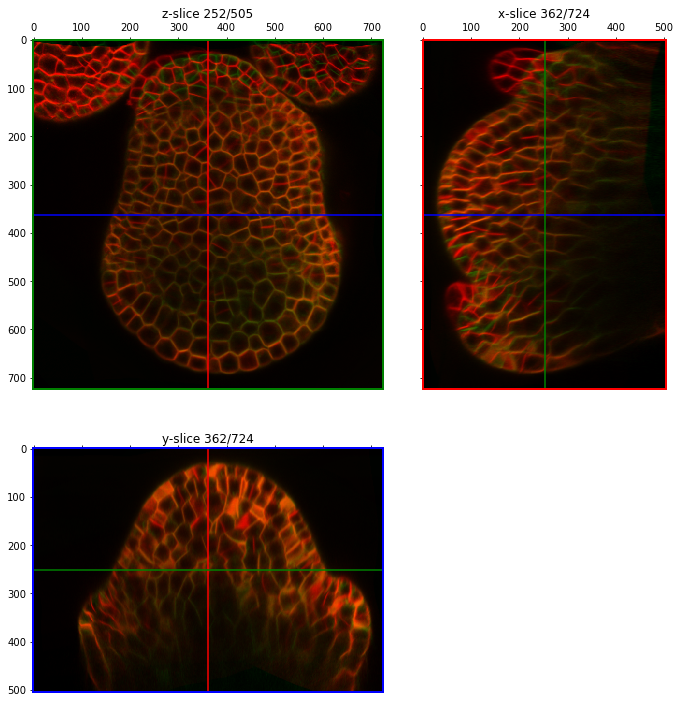

In [15]:
orthogonal_view(int_reg, figsize=(12., 12.))

## Initialize with a rigid transformation and a manual lineage

This rigid transformation has been obtained using a manual lineage.

In [3]:
from timagetk.io.trsf import read_trsf
init_trsf = read_trsf('/data/FPS_paper/Old_Data/p194/trsf/p194-t4_t5-rigid.trsf')

In [4]:
from ctrl.io import read_lineage
init_lin = read_lineage('/data/FPS_paper/Old_Data/p194/lineage/p194_t4-5_lineage.txt')

2021-09-24 12:49:50,518 - ctrl.io - 107 - INFO - Loading lineage from file '/data/FPS_paper/Old_Data/p194/lineage/p194_t4-5_lineage.txt'...


In [5]:
tracker = CellTracking(mother_img, daughter_img, mother_seg_img, daughter_seg_img, trsf_direction="backward",
                       init_trsf=init_trsf, previous_lineage=init_lin)
tracker._auto_register(fs_coef=3.5, vpd_coef=0.5, vfd_coef=1.5)

2021-09-24 12:49:52,266 - ctrl.tracking - 777 - INFO - # Automatic estimation of non-linear transformation in 'backward' direction...
2021-09-24 12:49:52,267 - ctrl.tracking - 796 - INFO - Automatic linear registration with initialisation...
2021-09-24 12:49:52,268 - timagetk.algorithms.blockmatching - 277 - INFO - AFFINE registration with a 'left' initialisation matrix
2021-09-24 12:50:31,589 - ctrl.tracking - 816 - INFO - Apply linear transformation to floating segmented image
2021-09-24 12:51:33,461 - ctrl.tracking - 821 - INFO - Relabelling daughter cells with mother ids to obtain matching pairs of barycenter
2021-09-24 12:51:33,464 - timagetk.components.labelled_image - 711 - INFO - Got an initial list of 3261 mapped labels, 3252 (99.7%) are found in the image and 9 (0.3%) are not!
2021-09-24 12:51:33,464 - timagetk.components.labelled_image - 712 - INFO - They will be remapped into 2210 unique labels!
2021-09-24 12:51:55,212 - timagetk.components.tissue_image - 256 - ERROR - Prov

In [6]:
from timagetk.algorithms.trsf import apply_trsf

In [7]:
daughter_reg = apply_trsf(daughter_img, tracker.trsf, interpolation="linear")

In [8]:
from timagetk.visu.stack import orthogonal_view
from timagetk.components.multi_channel import combine_channels

In [9]:
int_reg = combine_channels([mother_img, daughter_reg], colors=['green', 'red'])

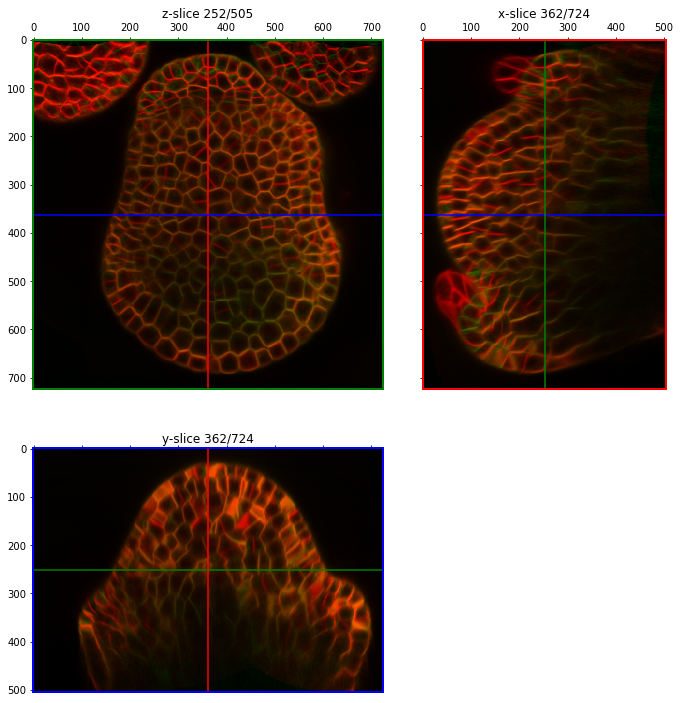

In [10]:
orthogonal_view(int_reg, figsize=(12., 12.))